<a href="https://colab.research.google.com/github/Teriekarie/DSCI_SGA/blob/main/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/STUTERN 1.3 ASSIGNMENT/module8

/content/drive/MyDrive/STUTERN 1.3 ASSIGNMENT/module8


In [3]:
#Import Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Load Tips Dataset
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Plotting the numerical values.

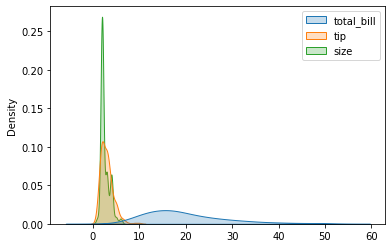

In [8]:
sns.kdeplot(data=tips,color='green', shade=True)
plt.show()

Generate a KDE plot for the size feature of the tips dataset.

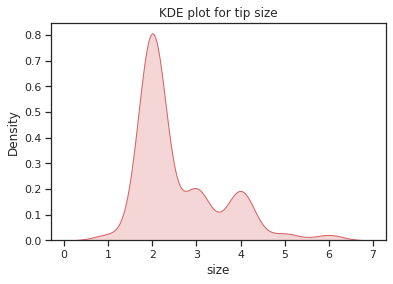

In [34]:
res = sns.kdeplot(data=tips['size'], color='r', shade=True)
plt.title('KDE plot for tip size')
plt.show()

Creating a subplot

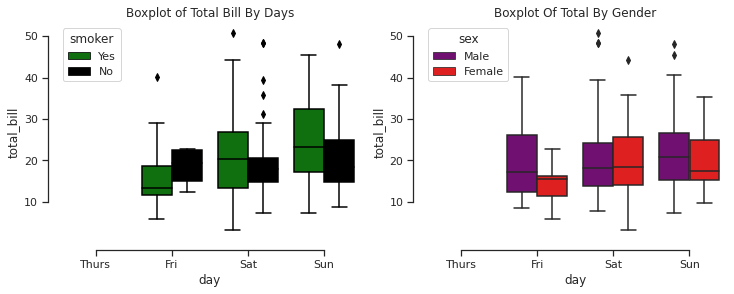

In [67]:
sns.set(style="ticks", palette="pastel")
order = ['Thurs', 'Fri', 'Sat', 'Sun'] #order to be shown on the graph

# creating a dictionary mapping for the colors of the sex and smokers
genders = dict(Female='red', Male='purple')
smokers = dict(Yes='green', No='black')

# set up 2 by 2 plots, overall figure size 12 by 4
f, axes = plt.subplots(1, 2, figsize=(12, 4))


# Using boxplots generate the distribution of total bill by days considering smoker status of the customer
sns.set(style="ticks", palette="muted")
sns.boxplot(x="day",y="total_bill", hue='smoker', data=tips, palette=smokers, order=order, ax=axes[0]) # controlling the day or
axes[0].set_title("Boxplot of Total Bill By Days")

# Using the boxplots, generate the distribution of total bill by gender for the tips dataset.
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=tips, palette=genders, order=order, ax=axes[1])
axes[1].set_title("Boxplot Of Total By Gender")
sns.despine(offset=10, trim=True); # remove the spines

looking at the total bill amounts per day shows that the amount spent increases at the weekend and is lowest on a Friday. When broken down by the sex of the bill payer it seems that the median amount spent on the bill is higher for males than females and is also more variable for males. Saturday seems to be the only day when the median bills for males and females are similar although there is more of a right skew on the bill amounts by males.

Using boxplots generate the distribution of tips by days

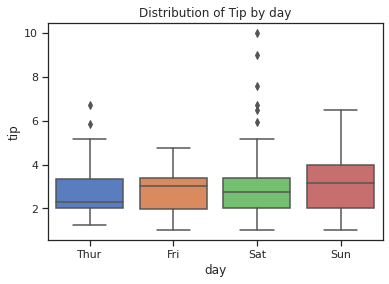

In [50]:
sns.boxplot(data=tips, x='day', y='tip')
plt.title('DISTRIBUTION OF TIPS BY DAYS IN THE DATASET')')
plt.show()


This shows that Thursdays are the lowest days with not so tangible tips but has a significant effect for sunday

Using violin plots generate the distribution of total bill by time given the genders

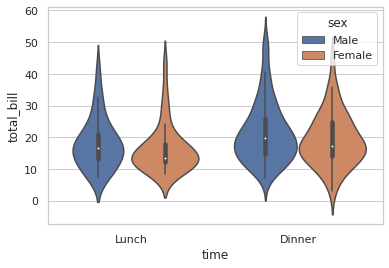

In [55]:
# use to set style of background of plot
sns.set(style="whitegrid")
sns.violinplot(x='time', y="total_bill", hue="sex", data=tips)
plt.title('DISTRIBUTION OF TOTALL BILL BY TIME IN THE DATASET')

Using violin plots generate the distribution of tips by days also considering time

Text(0.5, 1.0, 'DISTRIBUTION OF TOTALL BILL BY DAYS IN THE DATASET')

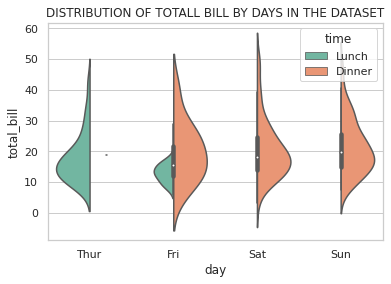

In [62]:
sns.violinplot(x="day", y="total_bill", hue="time",
                    data=tips, palette="Set2", split=True,
                    scale="count")
plt.title('DISTRIBUTION OF TOTALL BILL BY DAYS IN THE DATASET')

Using violin plots generate the distribution of tips by days also considering time

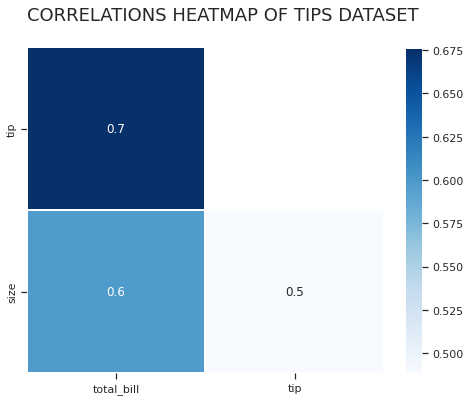

In [75]:
# creating mask
mask = np.triu(np.ones_like(tips.corr()))
corr=tips.corr()
 # adjust mask and correlations 
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# generate customized heatmap of correlations
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True,fmt=".1f",cmap='Blues', linewidths=.9, cbar_kws={'shrink':.99})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap of Tips Dataset \n".upper(), fontdict={'fontsize': 18}, loc='left')
plt.show()

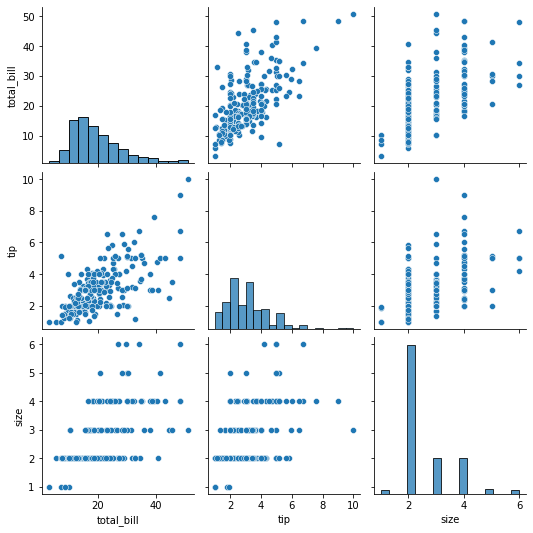

In [7]:
sns.pairplot(tips)